<h1>Restaurant Data Analysis Level 2</h1>

**Summary**

Task 1: Table Booking and Online Delivery Analysis

- Calculated the percentage of restaurants offering table booking and online delivery services.
- Conducted a comparative analysis of average ratings for restaurants with and without table booking.
- Explored the availability of online delivery options across various price ranges, revealing valuable insights into customer preferences.

Task 2: Price Range Analysis

- Determined the most common price range among all restaurants.
- Computed the average rating for each price range, helping identify high-performing price segments.
- Identified the color associated with the highest average rating, simplifying the identification of top-rated price ranges.

Task 3: Feature Engineering

- Employed advanced feature engineering techniques to extract additional insights from existing columns.
- Generated new features like "Has Table Booking" and "Has Online Delivery" by encoding categorical variables, enhancing the dataset's intelligence.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('Dataset .csv')

In [3]:
#EDA
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()
#to get a general info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()
#to get mean,deviation etc of the dataframe

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: >

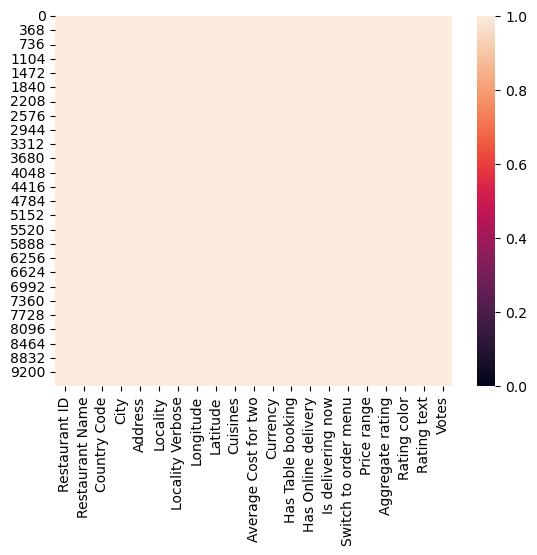

In [6]:
#to check for any null values
sns.heatmap(df.notna())

<h2>Task 1</h2>
Table Booking and Online Delivery

**1. To determine the percentage of restaurants that
offer table booking and online delivery**

In [7]:
restaurants_with_table_and_online=df[(df['Has Table booking']=='Yes') & (df['Has Online delivery']=='Yes')]
restaurants_with_table = df[(df['Has Table booking']=='Yes') & (df['Has Online delivery']=='No')]
restaurants_with_online= df[(df['Has Online delivery']=='Yes') & (df['Has Table booking']=='No')]

In [8]:
#display the output
print('percentage of restaurants that offer table booking and online delivery:',(len(restaurants_with_table_and_online)/len(df)*100),'%')
print('percentage of restaurants that offer only table booking:',(len(restaurants_with_table)/len(df)*100),'%')
print('percentage of restaurants that offer only online delivery:',(len(restaurants_with_online)/len(df)*100),'%')

percentage of restaurants that offer table booking and online delivery: 4.554496911318187 %
percentage of restaurants that offer only table booking: 7.569887969846089 %
percentage of restaurants that offer only online delivery: 21.10773740969532 %


**2. To compare the average ratings of restaurants
with table booking and those without**

In [9]:
#to display the average ratings of restaurants with and without table bookings
print('Average rating of restaurants with and without table booking')
df.groupby('Has Table booking').mean('Aggregate rating')['Aggregate rating']

Average rating of restaurants with and without table booking


Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

**3. To Analyze the availability of online delivery
among restaurants with different price ranges**

In [10]:
print('Availability of online delivery among restaurants with different price ranges')
df.groupby('Price range').count()['Has Online delivery']

Availability of online delivery among restaurants with different price ranges


Price range
1    4444
2    3113
3    1408
4     586
Name: Has Online delivery, dtype: int64

<h2> Task 2 </h2>
Price Range Analysis

**1. To Determine the most common price range
among all the restaurants**

In [11]:
#to display the common price range
common_price_range= int(df['Price range'].mode()[0])
print('the most common price range is:',common_price_range)

the most common price range is: 1


**2. To Calculate the average rating for each price
range.**

In [12]:
print('The average ratings among different price ranges:')
df.groupby('Price range')['Aggregate rating'].mean()
#by grouping with the price range and performing mean on the aggregate rating, we can achieve the output.

The average ratings among different price ranges:


Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

**3. To Identify the color that represents the highest
average rating among different price ranges**

In [13]:
df.groupby('Price range').mean('Aggregate rating')

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
Price range,,,,,,,
1,1.017772e+07,7.896265,67.032050,26.807458,275.182943,1.999887,44.597435
2,8.585929e+06,16.816254,63.657955,26.737424,596.826213,2.941054,147.607131
3,7.706136e+06,39.527699,58.793913,24.195927,5177.268466,3.683381,443.860795
4,6.210411e+06,55.145051,57.394946,17.920442,1848.523891,3.817918,368.595563


In [14]:
price_range_rating=dict(df.groupby('Price range')['Aggregate rating'].max())
#create a variable converting the price range and maximum aggregate rating into a dictionary

In [15]:
rating_to_color=dict(zip(df['Aggregate rating'],df['Rating color']))
#created a dictionary consisting of aggregate rating and rating color

In [16]:
for x in price_range_rating:
    price_range_rating[x]=rating_to_color[price_range_rating[x]]
#overriding the previous dictionary with rating color


In [17]:
#put our needed dictionary in a dataframe and rename indices and column
result=pd.DataFrame.from_dict(price_range_rating,orient='index')
result.index.name='Price range'
result.rename(columns={0:'rating color'},inplace=True)
print(result)

            rating color
Price range             
1             Dark Green
2             Dark Green
3             Dark Green
4             Dark Green


<h2>Task 3</h2>
Feature Engineering

**1. To Extract additional features from the existing
columns, such as the length of the restaurant
name or address.**

In [18]:
df['Length of restaurant name']=df['Restaurant Name'].apply(lambda x:len(x))
#Here, we apply a lambda function to make a temporary function to find length of name and pass this to the name column.

In [19]:
df['Length of restaurant address']=df['Address'].apply(lambda x:len(x))
#we apply the same trick for address

In [20]:
df[['Length of restaurant name','Length of restaurant address']]
#new columns with extracted features have been added to our dataframe

,Length of restaurant name,Length of restaurant address
0,16,71
1,16,67
2,22,56
3,4,70
4,11,64
...,...,...
9546,11,103
9547,12,77
9548,5,73
9549,11,75


**2. To Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables**

In [21]:
#we can see that, these two columns have only two values 'yes' and 'no'
df[['Has Table booking','Has Online delivery']].value_counts()

Has Table booking  Has Online delivery
No                 No                     6377
                   Yes                    2016
Yes                No                      723
                   Yes                     435
Name: count, dtype: int64

In [22]:
#we can encode them using dummy variables
x=pd.get_dummies(df[['Has Table booking','Has Online delivery']])

In [23]:
#remodelling data by removing unnecessary columns and renaming them
x.drop(['Has Table booking_No','Has Online delivery_No'],axis=1,inplace=True)
x.rename(columns={'Has Table booking_Yes':'Has Table booking','Has Online delivery_Yes':'Has Online delivery'},inplace=True)

In [24]:
#assigning the new values in the table x to our original dataframe df
df[['Has Table booking','Has Online delivery']]=x

In [25]:
df[['Has Table booking','Has Online delivery']]
#categorical variables have been encoded as true and false

,Has Table booking,Has Online delivery
0,True,False
1,True,False
2,True,False
3,False,False
4,True,False
...,...,...
9546,False,False
9547,False,False
9548,False,False
9549,False,False


<h2>Project Conclusion</h2>

Table Booking and Online Delivery:

- Approximately 21.10% of the restaurants offer only online delivery
- Restaurants with table booking have a higher average rating of 3.44, compared to 2.55 for those without this service.
- Online delivery is more among restaurants with price range 1.

Price Range Analysis:

- The most common price range among restaurants is 1.
- Restaurants in price range 4 have the most aggregate rating.

Feature Engineering:

- Introduced two new columns, 'Length of restaurant name' and 'Length of restaurant address' based on the length of restaurant names and addresses.
- Created two binary columns, 'Has Table Booking' and 'Has Online Delivery,' by creating dummy variables.